### Importación de librerías

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sentence_transformers import SentenceTransformer, util
import tensorflow_hub as hub
#from tensorflow_text import SentencepieceTokenizer
import sklearn.metrics.pairwise
from simpleneighbors import SimpleNeighbors
from tqdm import tqdm
from tqdm import trange
import tensorflow.compat.v2 as tf
import torch
import time
from unidecode import unidecode
import math
import faiss

### Configuracion notebook

In [26]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 4000)

### Carga de modelos

In [27]:
model_minilm = SentenceTransformer('all-MiniLM-L6-v2')
model_mpnet = SentenceTransformer('all-mpnet-base-v2')
model_multilingual_distiluse_v1 = SentenceTransformer('distiluse-base-multilingual-cased-v1')
model_multilingual_distiluse_v2 = SentenceTransformer('distiluse-base-multilingual-cased-v2')
model_multilingual_minilm = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
model_multilingual_mpnet = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
'''
model_use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
model_use_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
model_use_multilingual = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")
model_use_multilingual_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
'''

'\nmodel_use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")\nmodel_use_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")\nmodel_use_multilingual = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")\nmodel_use_multilingual_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")\n'

## Generación e indexado de embeddings

In [28]:
def generate_embeddings(messages):
    result = []
    
    start_encoding = time.time()
    embeddings_minilm = model_minilm.encode(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_minilm.shape[1])
    index.add(embeddings_minilm)
    faiss.write_index(index, './indexes/index_embeddings_minilm')
    end_indexing = time.time()
    result.append({"model": "minilm", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_minilm})

    start_encoding = time.time()
    embeddings_mpnet = model_mpnet.encode(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_mpnet.shape[1])
    index.add(embeddings_mpnet)
    faiss.write_index(index, './indexes/index_embeddings_mpnet')
    end_indexing = time.time()
    result.append({"model": "mpnet", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_mpnet})

    start_encoding = time.time()
    embeddings_multilingual_distiluse_v1 = model_multilingual_distiluse_v1.encode(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_multilingual_distiluse_v1.shape[1])
    index.add(embeddings_multilingual_distiluse_v1)
    faiss.write_index(index, './indexes/index_embeddings_multilingual_distiluse_v1')
    end_indexing = time.time()
    result.append({"model": "multilingual_distiluse_v1", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_multilingual_distiluse_v1})

    start_encoding = time.time()
    embeddings_multilingual_distiluse_v2 = model_multilingual_distiluse_v2.encode(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_multilingual_distiluse_v2.shape[1])
    index.add(embeddings_multilingual_distiluse_v2)
    faiss.write_index(index, './indexes/index_embeddings_multilingual_distiluse_v2')
    end_indexing = time.time()
    result.append({"model": "multilingual_distiluse_v2", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_multilingual_distiluse_v2})

    start_encoding = time.time()
    embeddings_multilingual_minilm = model_multilingual_minilm.encode(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_multilingual_minilm.shape[1])
    index.add(embeddings_multilingual_minilm)
    faiss.write_index(index, './indexes/index_embeddings_multilingual_minilm')
    end_indexing = time.time()
    result.append({"model": "multilingual_minilm", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_multilingual_minilm})

    start_encoding = time.time()
    embeddings_multilingual_mpnet = model_multilingual_mpnet.encode(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_multilingual_mpnet.shape[1])
    index.add(embeddings_multilingual_mpnet)
    faiss.write_index(index, './indexes/index_embeddings_multilingual_mpnet')
    end_indexing = time.time()
    result.append({"model": "multilingual_mpnet", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_multilingual_mpnet})

    '''
    start_encoding = time.time()
    embeddings_use = model_use(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_use.shape[1])
    index.add(embeddings_use)
    faiss.write_index(index, './indexes/index_embeddings_use')
    end_indexing = time.time()
    result.append({"model": "use", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_use})
    '''
    '''
    start_encoding = time.time()
    embeddings_use_large = model_use_large(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_use_large.shape[1])
    index.add(embeddings_use_large)
    faiss.write_index(index, './indexes/index_embeddings_use_large')
    end_indexing = time.time()
    result.append({"model": "use_large", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_use_large})
    '''
    '''
    start_encoding = time.time()
    embeddings_use_multilingual = model_use_multilingual(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_use_multilingual.shape[1])
    index.add(embeddings_use_multilingual)
    faiss.write_index(index, './indexes/index_embeddings_use_multilingual')
    end_indexing = time.time()
    result.append({"model": "use_multilingual", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_use_multilingual})
    '''
    '''
    start_encoding = time.time()
    embeddings_use_multilingual_large = model_use_multilingual_large(messages)
    end_encoding = time.time()
    start_indexing = time.time()
    index = faiss.IndexFlatL2(embeddings_use_multilingual_large.shape[1])
    index.add(embeddings_use_multilingual_large)
    faiss.write_index(index, './indexes/index_embeddings_use_multilingual_large')
    end_indexing = time.time()
    result.append({"model": "use_multilingual_large", "time_encoding": end_encoding - start_encoding, "time_indexing": end_indexing - start_indexing, "tensor": embeddings_use_multilingual_large})
   '''

    return result

### Mapa de calor de similaridad

In [29]:
def plot_similarity(labels, features, rotation, ax, title):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd",
      ax=ax
      )
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title(title)

### Mapa de calor todos los modelos

In [30]:
def plot_embeddings_heatmap(embeddings, messages):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(ncols=2, nrows=5, sharey=True, figsize=(30, 70), constrained_layout=True)
    for (embedding, ax) in zip(embeddings, [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
        plot_similarity(messages, embedding["tensor"], 90, ax, embedding["model"])

### Mapa de calor tiempos

In [31]:
def plot_embeddings_timing(embeddings, measure="time_encoding"):
    fig, ax = plt.subplots(figsize=(30, 10))
    times = [embedding[measure] for embedding in embeddings]
    ax.bar([embedding["model"] for embedding in embeddings], times)
    if (measure == "time_encoding"):
        ax.set_title("Time to generate embeddings")
    else:
        ax.set_title("Time to index embeddings")
    ax.set_ylabel("Time in seconds")
    ax.set_xlabel("Model")

### Prueba términos

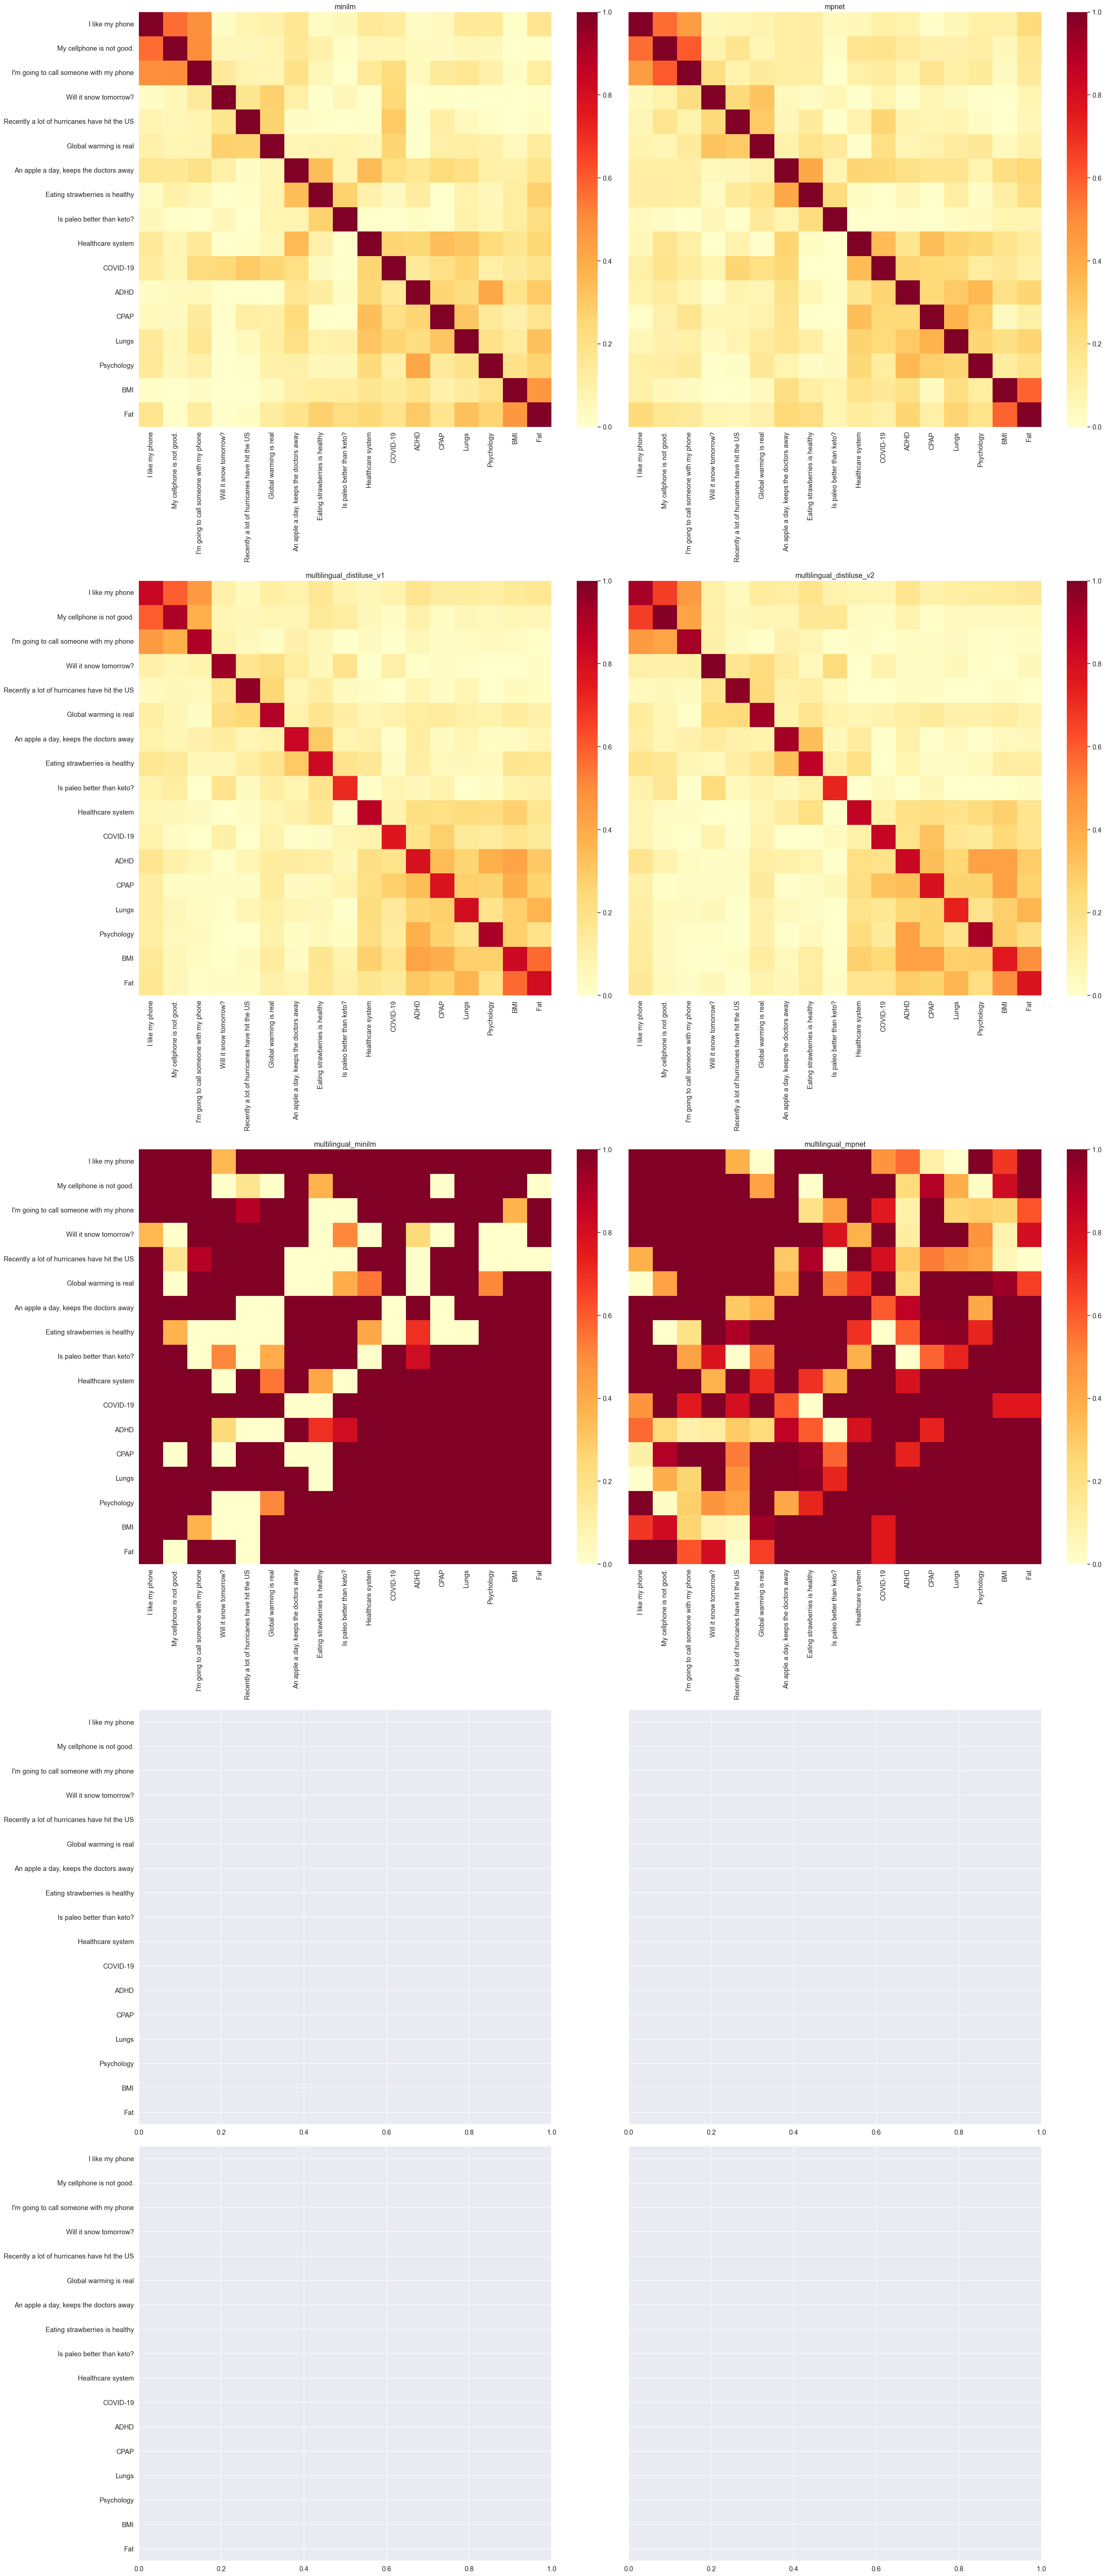

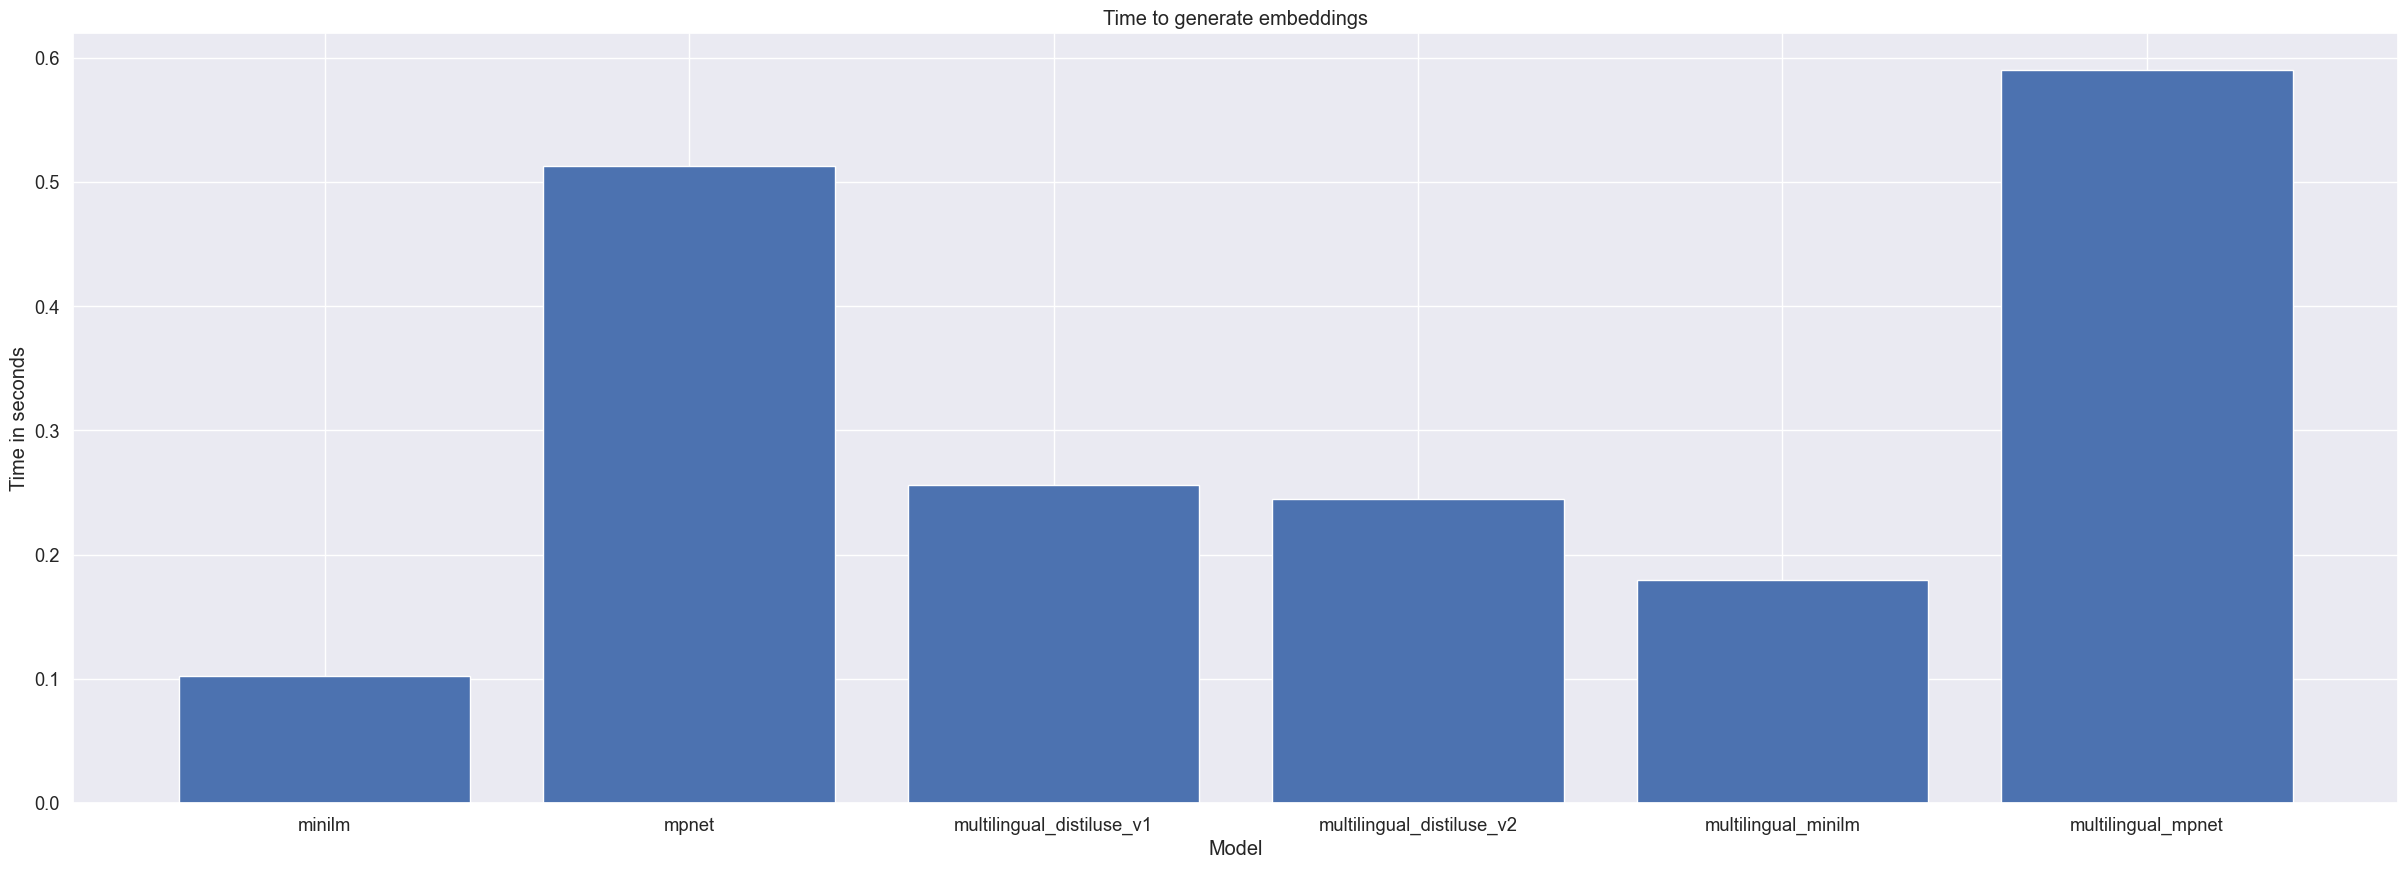

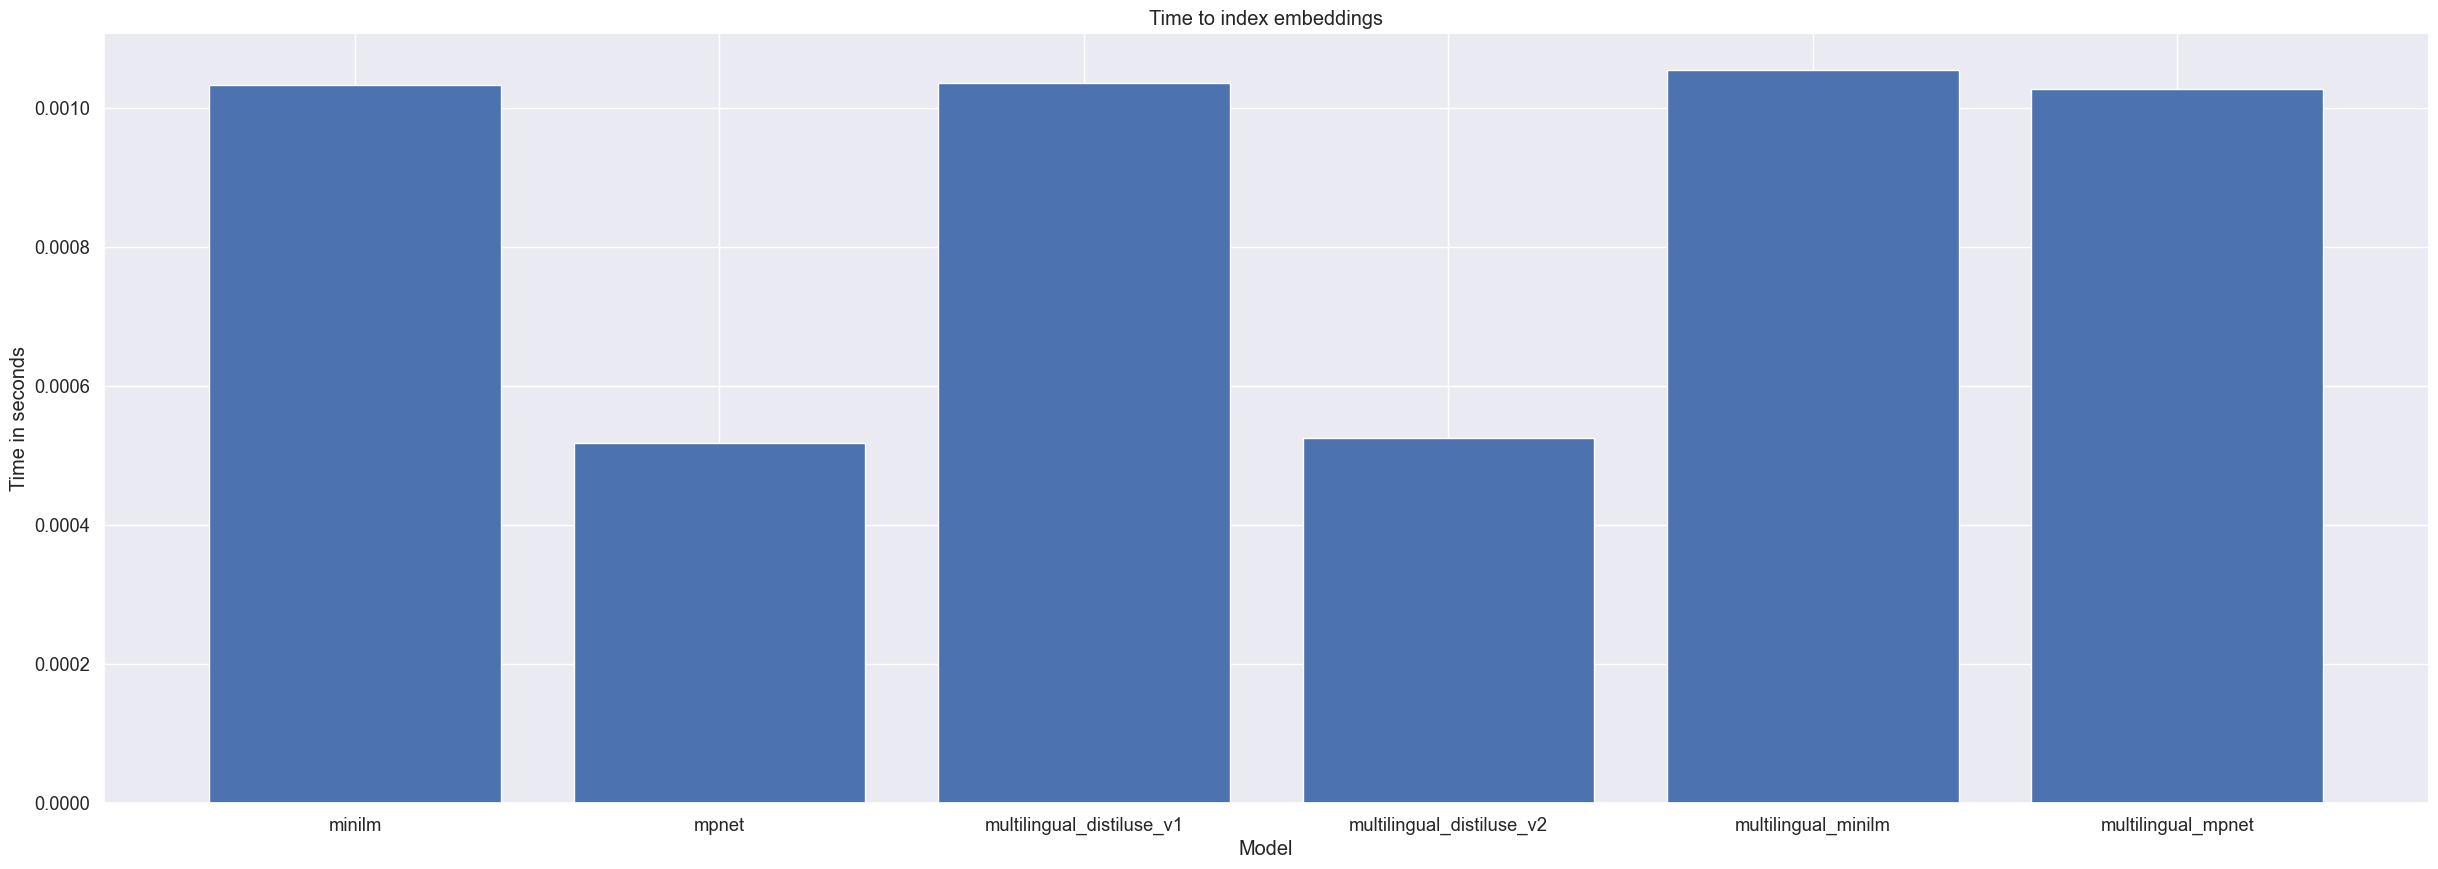

In [32]:
messages_sample = [
    "I like my phone",
    "My cellphone is not good.",
    "I'm going to call someone with my phone",
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",
    "Healthcare system",
    "COVID-19",
    "ADHD",
    "CPAP",
    "Lungs",
    "Psychology",
    "BMI",
    "Fat"
]

embeddings_sample = generate_embeddings(messages_sample)
plot_embeddings_heatmap(embeddings_sample, messages_sample)
plot_embeddings_timing(embeddings_sample, "time_encoding")
plot_embeddings_timing(embeddings_sample, "time_indexing")

## Búsqueda

### Generacion de resultados

In [33]:
def search(model, corpus, query, top_k=5, search_method="sbert", model_source="sbert"):
    result = {}
    
    start = time.time()
    if model_source == "sbert":
        query_embeddings = model.encode([query])
        corpus_embeddings = corpus["tensor"]
    elif model_source == "tf":
        query_embeddings = model([query]).numpy()
        corpus_embeddings = corpus["tensor"].numpy()
    
    if search_method == "sbert":
        hits = util.semantic_search(query_embeddings, corpus_embeddings, top_k=top_k)
        top_results = np.array([hit['corpus_id'] for hit in hits[0]])
    elif search_method == "torch":
        cos_scores = util.cos_sim(query_embeddings, corpus_embeddings)[0]
        top_results = torch.topk(cos_scores, k=top_k).indices.tolist()
    elif search_method == "numpy":
        cos_scores = util.cos_sim(query_embeddings, corpus_embeddings)[0]
        top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k]
    elif search_method == "faiss":
        index = faiss.read_index("./indexes/index_embeddings_" + corpus["model"])
        top_results = index.search(query_embeddings, top_k)[1][0]
    elif search_method == "tf":
        cos_scores = tf.keras.losses.cosine_similarity(query_embeddings, corpus_embeddings, axis=1)
        top_results = tf.math.top_k(cos_scores, k=top_k)
        top_results = (top_results.indices.numpy(), top_results.values.numpy())[0]
    
    end = time.time()

    result = {
        "results": top_results,
        "time": end - start,
        "model": corpus["model"],
        "search_method": search_method,
    }
    return result

### Busqueda con todos los métodos de búsqueda

In [34]:
def search_all(query, k, embeddings):
    total = []
    
    results = []
    results.append(search(model_multilingual_distiluse_v1, embeddings[2], query, k, "sbert", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v1, embeddings[2], query, k, "torch", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v1, embeddings[2], query, k, "numpy", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v1, embeddings[2], query, k, "faiss", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v1, embeddings[2], query, k, "tf", model_source="sbert"))
    total.append(results)

    results = []
    results.append(search(model_multilingual_distiluse_v2, embeddings[3], query, k, "sbert", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v2, embeddings[3], query, k, "torch", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v2, embeddings[3], query, k, "numpy", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v2, embeddings[3], query, k, "faiss", model_source="sbert"))
    results.append(search(model_multilingual_distiluse_v2, embeddings[3], query, k, "tf", model_source="sbert"))
    total.append(results)
    
    results = []
    results.append(search(model_multilingual_minilm, embeddings[4], query, k, "sbert", model_source="sbert"))
    results.append(search(model_multilingual_minilm, embeddings[4], query, k, "torch", model_source="sbert"))
    results.append(search(model_multilingual_minilm, embeddings[4], query, k, "numpy", model_source="sbert"))
    results.append(search(model_multilingual_minilm, embeddings[4], query, k, "faiss", model_source="sbert"))
    results.append(search(model_multilingual_minilm, embeddings[4], query, k, "tf", model_source="sbert"))
    total.append(results)

    results = []
    results.append(search(model_multilingual_mpnet, embeddings[5], query, k, "sbert", model_source="sbert"))
    results.append(search(model_multilingual_mpnet, embeddings[5], query, k, "torch", model_source="sbert"))
    results.append(search(model_multilingual_mpnet, embeddings[5], query, k, "numpy", model_source="sbert"))
    results.append(search(model_multilingual_mpnet, embeddings[5], query, k, "faiss", model_source="sbert"))
    results.append(search(model_multilingual_mpnet, embeddings[5], query, k, "tf", model_source="sbert"))
    total.append(results)
    
    '''
    results = []
    results.append(search(model_use_multilingual, embeddings[8], query, k, "sbert", model_source="tf"))
    results.append(search(model_use_multilingual, embeddings[8], query, k, "torch", model_source="tf"))
    results.append(search(model_use_multilingual, embeddings[8], query, k, "numpy", model_source="tf"))
    results.append(search(model_use_multilingual, embeddings[8], query, k, "faiss", model_source="tf"))
    results.append(search(model_use_multilingual, embeddings[8], query, k, "tf", model_source="tf"))
    total.append(results)
    '''
    '''
    results = []
    results.append(search(model_use_multilingual_large, embeddings[9], query, k, "sbert", model_source="tf"))
    results.append(search(model_use_multilingual_large, embeddings[9], query, k, "torch", model_source="tf"))
    results.append(search(model_use_multilingual_large, embeddings[9], query, k, "numpy", model_source="tf"))
    results.append(search(model_use_multilingual_large, embeddings[9], query, k, "faiss", model_source="tf"))
    results.append(search(model_use_multilingual_large, embeddings[9], query, k, "tf", model_source="tf"))
    total.append(results)
    '''

    return total

### Mapa de calor de tiempos

In [35]:
def plot_search_timing(results):
    times = [[result["time"] for result in results] for results in results]
    plot = sns.heatmap(times, annot=True, fmt=".3f", xticklabels=["sbert", "torch", "numpy", "faiss", "tf"], yticklabels=["multilingual_distiluse_v1", "multilingual_distiluse_v2", "multilingual_minilm", "multilingual_mpnet", "use_multilingual", "use_multilingual_large"])
    plot.set_title("Time to search")
    plot.set_ylabel("Model")
    plot.set_xlabel("Search method")

## Resultados de búsqueda

In [36]:
def search_results(results, dataset, dataframe=True):
    labels = []
    for model_index, model in enumerate(results):
        for search_method_index, search_method in enumerate(model):
            label = {}
            label["model"] = results[model_index][0]["model"]
            label["search_method"] = search_method["search_method"]
            if (dataframe):
                titles = [dataset.iloc[[i]]["titulo_del_proyecto"].values[0] for i in search_method["results"]]
                aux_results = []
                for title_index, title in enumerate(titles):
                    aux_results.append((str(title_index + 1) + ". " + title))
                label["results"] = aux_results
            else:
                label["results"] = [str(index + 1) + ". " + dataset[i] for index, i in enumerate(search_method["results"])]
            
            labels.append(label)

    return pd.DataFrame.from_dict(labels)

### Prueba resultados

,model,search_method,results
0,multilingual_distiluse_v1,sbert,"[1. Fat, 2. Lungs, 3. ADHD, 4. BMI, 5. CPAP, 6. Psychology, 7. COVID-19, 8. I like my phone, 9. Healthcare system, 10. Eating strawberries is healthy]"
1,multilingual_distiluse_v1,torch,"[1. Fat, 2. Lungs, 3. ADHD, 4. BMI, 5. CPAP, 6. Psychology, 7. COVID-19, 8. I like my phone, 9. Healthcare system, 10. Eating strawberries is healthy]"
2,multilingual_distiluse_v1,numpy,"[1. Fat, 2. Lungs, 3. ADHD, 4. BMI, 5. CPAP, 6. Psychology, 7. COVID-19, 8. I like my phone, 9. Healthcare system, 10. Eating strawberries is healthy]"
3,multilingual_distiluse_v1,faiss,"[1. Fat, 2. ADHD, 3. Lungs, 4. BMI, 5. CPAP, 6. COVID-19, 7. I like my phone, 8. Psychology, 9. Healthcare system, 10. Eating strawberries is healthy]"
4,multilingual_distiluse_v1,tf,"[1. Recently a lot of hurricanes have hit the US, 2. Is paleo better than keto?, 3. My cellphone is not good., 4. An apple a day, keeps the doctors away, 5. I'm going to call someone with my phone, 6. Will it snow tomorrow?, 7. Global warming is real, 8. Eating strawberries is healthy, 9. Healthcare system, 10. I like my phone]"
5,multilingual_distiluse_v2,sbert,"[1. Fat, 2. Lungs, 3. BMI, 4. CPAP, 5. ADHD, 6. Psychology, 7. COVID-19, 8. I like my phone, 9. Healthcare system, 10. Global warming is real]"
6,multilingual_distiluse_v2,torch,"[1. Fat, 2. Lungs, 3. BMI, 4. CPAP, 5. ADHD, 6. Psychology, 7. COVID-19, 8. I like my phone, 9. Healthcare system, 10. Global warming is real]"
7,multilingual_distiluse_v2,numpy,"[1. Fat, 2. Lungs, 3. BMI, 4. CPAP, 5. ADHD, 6. Psychology, 7. COVID-19, 8. I like my phone, 9. Healthcare system, 10. Global warming is real]"
8,multilingual_distiluse_v2,faiss,"[1. Lungs, 2. Fat, 3. BMI, 4. CPAP, 5. ADHD, 6. Psychology, 7. COVID-19, 8. Healthcare system, 9. I like my phone, 10. Is paleo better than keto?]"
9,multilingual_distiluse_v2,tf,"[1. Recently a lot of hurricanes have hit the US, 2. Is paleo better than keto?, 3. An apple a day, keeps the doctors away, 4. I'm going to call someone with my phone, 5. My cellphone is not good., 6. Eating strawberries is healthy, 7. Will it snow tomorrow?, 8. Global warming is real, 9. Healthcare system, 10. I like my phone]"


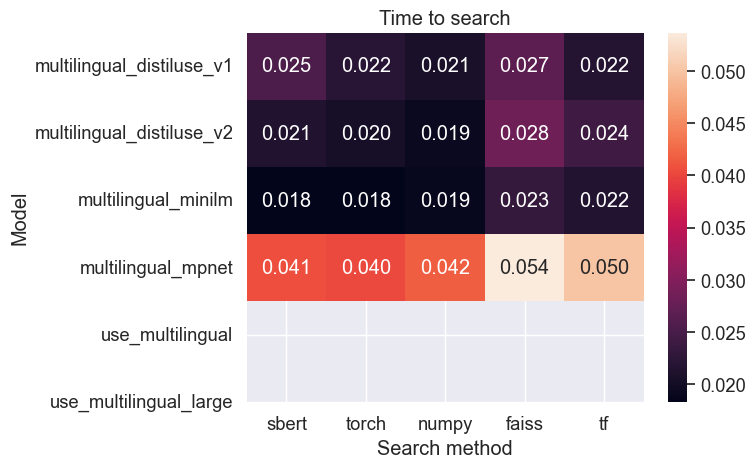

In [37]:
results_sample = search_all("Lluvia", 10, embeddings_sample)
plot_search_timing(results_sample)
results_df = search_results(results_sample, messages_sample, dataframe=False)
results_df

## Titulos investigaciones

### Importacion y limpieza de datos

In [39]:
inv_df = pd.read_excel('../../xlsx/InvestigarPUJ.xlsx', sheet_name='Hoja1', converters={'ID PROYECTO':str})
siap_df = pd.read_excel('../../xlsx/Descriptores SIAP 2023.xlsx', sheet_name='SIAP ', converters={'ID Proy':str})
inv_full_df = pd.read_excel('../../xlsx/Descriptores SIAP 2023.xlsx', sheet_name='InvestigarPUJ', converters={'Id':str})

inv_full_df.drop("Año", axis=1, inplace=True)

datasets = [inv_df, siap_df, inv_full_df]
for dataset in datasets:
    dataset.replace('\\N', np.NaN, inplace=True)
    dataset.replace('null', np.NaN, inplace=True)
    dataset.replace('nan', np.NaN, inplace=True)
    dataset.replace('N/A', np.NaN, inplace=True)


merged = inv_df.merge(siap_df, left_on="ID PROYECTO", right_on="ID Proy", how="left")
df = merged.merge(inv_full_df, left_on="ID PROYECTO", right_on="Id", how="left")

df = df.groupby("ID PROYECTO").agg(lambda x: list(set(x))).applymap(lambda x: ', '.join(str(y) for y in x if str(y) != 'nan') if isinstance(x, list) else x)
df = df.reset_index()
df.columns = [unidecode(x.lower().strip().replace(" ", "_").replace("__", "_").replace(".", "")) for x in df.columns]

df.replace('', np.NaN, inplace=True)

df["descripcion"] = df["descripcion_x"].fillna("") + df["descripcion_y"].fillna("")

df.drop("titulo_x", axis=1, inplace=True)
df.drop("titulo_y", axis=1, inplace=True)
df.drop("id_proy", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)
df.drop("financiador", axis=1, inplace=True)
df.drop("tipo_propuesta", axis=1, inplace=True)
df.drop("descripcion_x", axis=1, inplace=True)
df.drop("descripcion_y", axis=1, inplace=True)
df.drop("id_propt", axis=1, inplace=True)
df.drop("f_inic_real", axis=1, inplace=True)
df.drop("f_final_real", axis=1, inplace=True)
df.drop("facultad", axis=1, inplace=True)
df.drop("departamento", axis=1, inplace=True)
df.drop("estado_proyecto", axis=1, inplace=True)
df.drop("nombre", axis=1, inplace=True)
df.drop("cantidad", axis=1, inplace=True)



#df[df["id_proyecto"] == "000000000007161"]
#df[df["id_proyecto"] == "004438"]
#df[df["id_proyecto"] == "20104"]

df = df[(df["tipo_de_propuesta"] == "ART") |
        (df["tipo_de_propuesta"] == "INN") |
        (df["tipo_de_propuesta"] == "NEW") |
        (df["tipo_de_propuesta"] == "PCA") |
        (df["tipo_de_propuesta"] == "PIS") |
        (df["tipo_de_propuesta"] == "PPC") |
        (df["tipo_de_propuesta"] == "PUE")]

df["corpus"] = df["titulo_del_proyecto"].fillna("") + " " + \
    df["nombre_facultad"].str.split().str[-1].fillna("") + " " + \
    df["nombre_del_departamento"].str.split().str[-1].fillna("") + " " + \
    df["descripcion"].fillna("") + " " + \
    df["resumen"].fillna("") + " " + \
    df["objetivos"].fillna("") + " " + \
    df["metodologia"].fillna("") + " " + \
    df["gran_area"].fillna("") + " " + \
    df["objetivo_socioeconomico"].fillna("") + " " + \
    df["palabras_clave"].fillna("")


df["corpus"] = df["corpus"].replace(r'\n',' ', regex=True).str.strip()

print(df.columns)
print(df.shape)

messages = df["corpus"].to_numpy()

Index(['id_proyecto', 'id_propuesta', 'tipo_de_propuesta', 'fecha_de_negociacion', 'ano', 'titulo_del_proyecto', 'fecha_inicial_real', 'fecha_final_real', 'nombre_facultad', 'nombre_del_departamento', 'convocatoria', 'nombre_patrocinador', 'nombre_grupo_de_investigacion', 'miembro_del_equipo', 'tipo_de_documento', 'numero_de_documento', 'nombres_y_apellidos', 'rol_en_el_proyecto', 'porcentaje_dedicacion', 'codigo_presupuesto', 'codigo_contrato_secre_juridica', 'valor_aprobado_patrocinador', 'contrapartida_terceros', 'contrapartida_rec_propi', 'contrapartida_rec_nuevo', 'rec_nuevos_unidade_academica', 'valor_contrapartida_total', 'valor_total', 'estado', 'codigo_tipo', 'convocatoria_nombre_corto', 'convocatoria', 'tipo_de_actividad', 'fecha_estimada_inicio', 'fecha_estimada_fin', 'id_empleado_responsable_puj', 'nombre_responsable_puj', 'departamento_responsable_puj', 'id_departamento_responsable_puj', 'facultad_responsable_puj', 'nombre_financiador_principal', 'resumen', 'objetivos',
  

In [40]:
df["corpus"].to_csv("../csv/corpus.csv", index=False)

### Descriptores

In [41]:
categories = df["nombre_facultad"].groupby(df["nombre_facultad"]).count().sort_values(ascending=False)
top20 = df["titulo_del_proyecto"].drop_duplicates().str.split(expand=True).stack().value_counts()[:20]

### Generacion embeddings

In [42]:
embeddings = generate_embeddings(messages)

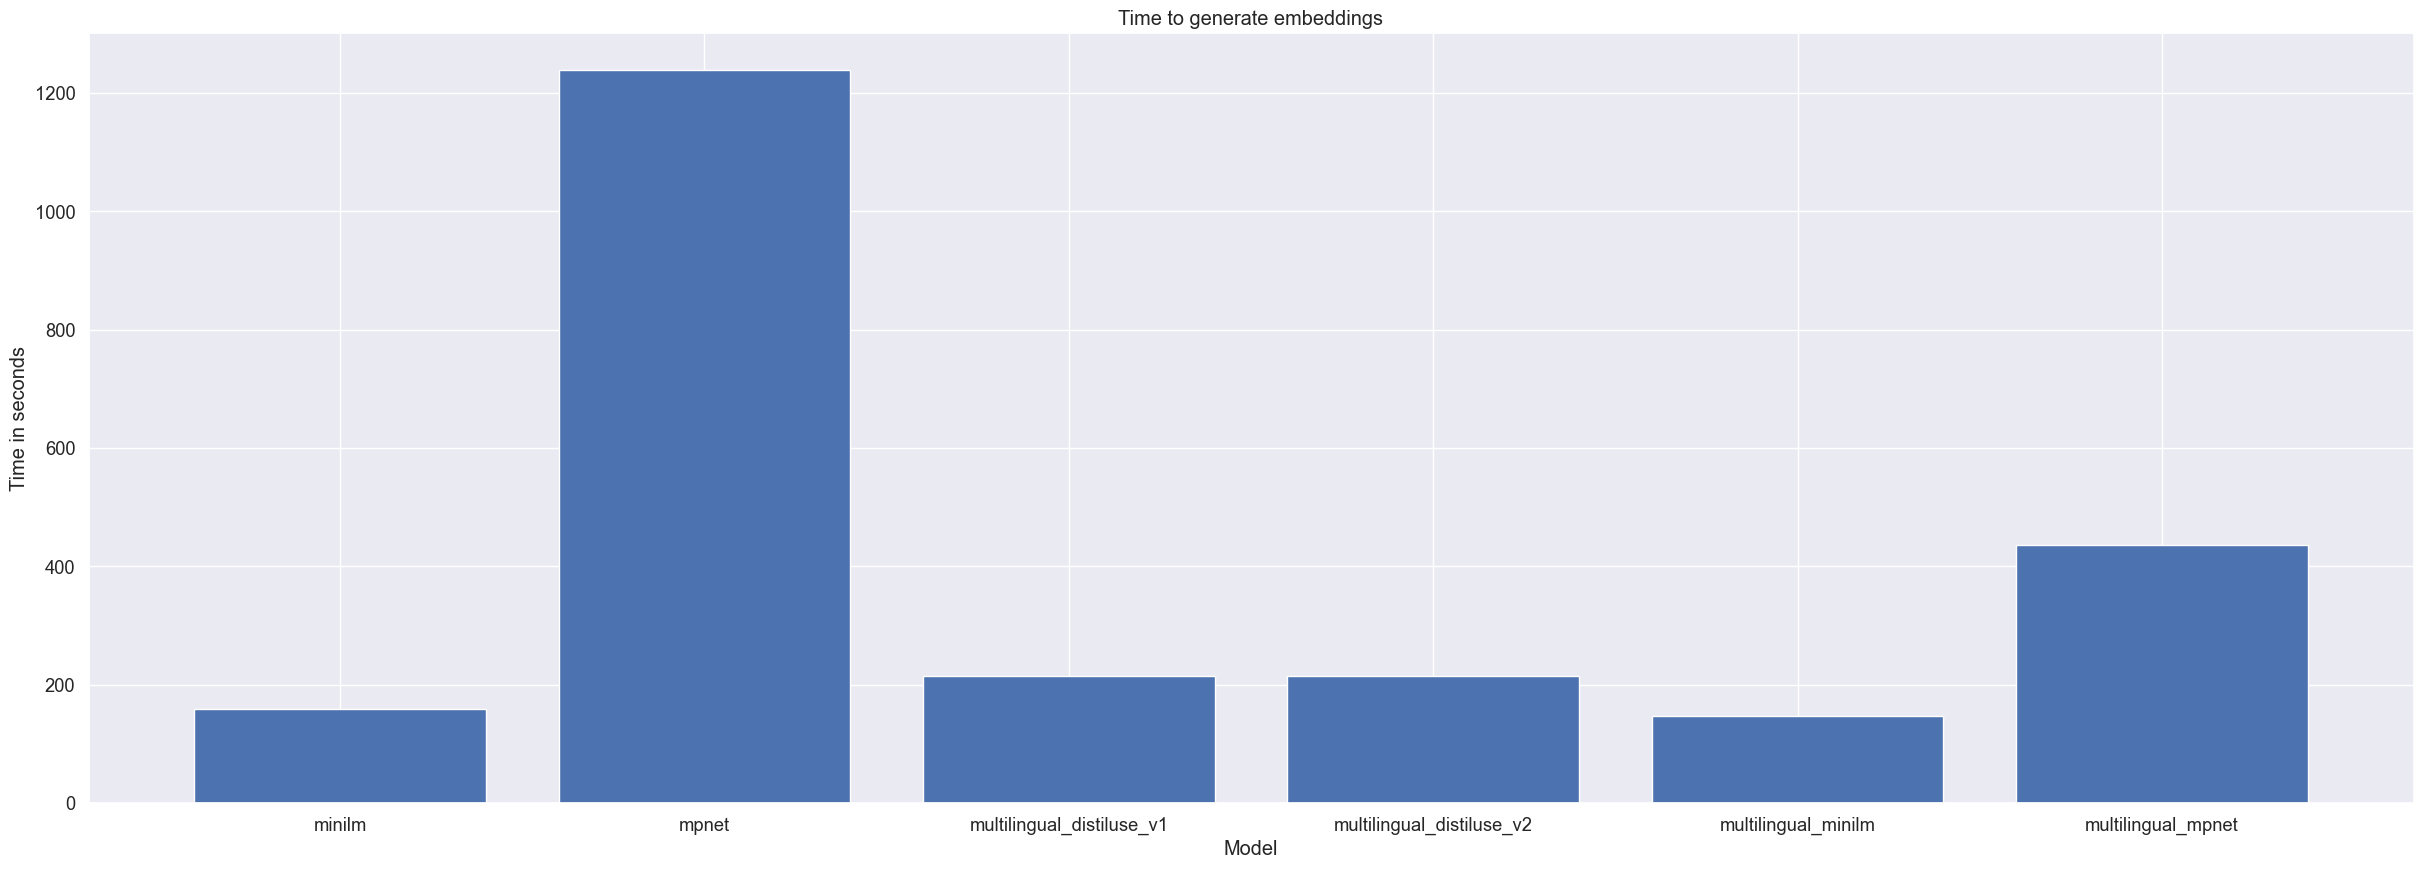

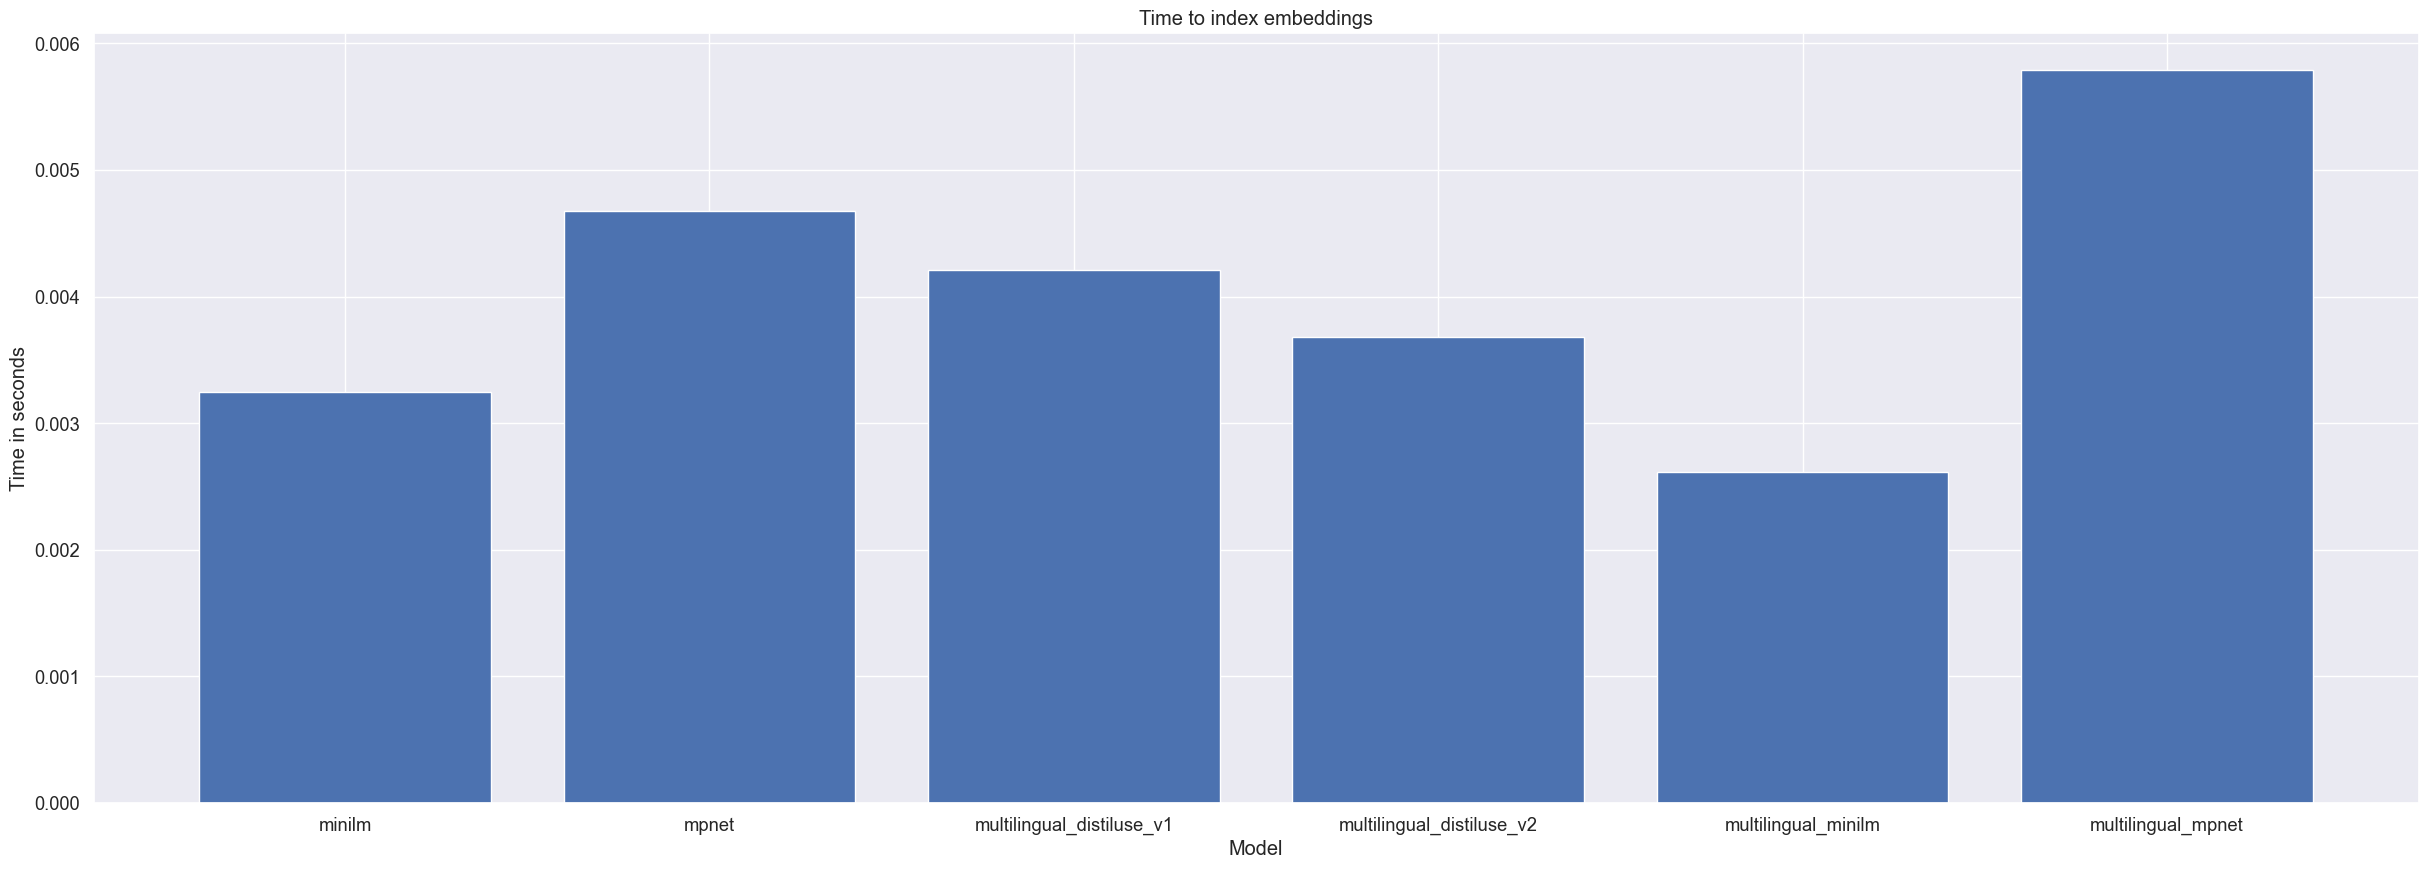

In [43]:
plot_embeddings_timing(embeddings, "time_encoding")
plot_embeddings_timing(embeddings, "time_indexing")

### Prueba busqueda

,model,search_method,results
0,multilingual_distiluse_v1,sbert,"[1. Creación e innovación como proceso evolutivo abierto en los mundos virtuales inmersivos, 2. Creencias y valoraciones sobre ""desarrollo"" y ""desarrollo rural"" de algunos sectores de la población colombiana, 3. Desarrollo de nuevos métodos y tecnologías para acelerar la construcción de software: un enfoque basado en modelos y frameworks de generación avanzados., 4. Trayectorias de salud en estudiantes universitarios (fase 2): un estudio longitudinal, 5. Sostenibilidad y desarrollo en los territorios: Una mirada sistémica y local al logro de paisajes rurales y sistemas de producción de alimentos sostenibles, 6. Building resilience and resources to overcome depression and anxiety in young people from urban neighbourhoods in Latin America, 7. Construyendo una iniciativa para un desarrollo digno de infancia temprana. Estudio de caso VIDAS MÓVILES, Ciudad Bolívar, Bogotá 2012 -2014, 8. Alternativas al desarrollo y políticas públicas, 9. Development serving the Global Common Good - Intercultural Research Project. Proyecto colaborativo entre la Pontificia Universidad Javeriana y la Universidad de Munich., 10. Semistability and decorated bundles.]"
5,multilingual_distiluse_v2,sbert,"[1. Una Mirada al Derecho desde la Sostenibilidad: desde la crisis del paradigma moderno de las ciencias jurídicas hasta el surgimiento de un nuevo paradigma contemporáneo cimentado en el desarrollo sostenible, 2. Inclusive Economic Growth for Sustainable Peace? Assessing Development Mechanisms and Conservation Efforts in Post-Conflict Colombia, 3. Semistability and decorated bundles., 4. Aportes de las organizaciones rurales de la economía social y solidaria a los objetivos del desarrollo sostenible, 5. DeSIRA- IDEAS Fortalecimiento de la Gobernanza y Estabilización de la Frontera Agropecuaria en territorios pos-conflicto de Colombia (Investigación y Desarrollo para la Estabilización de la frontera Agropecuaria), 6. Sostenibilidad y desarrollo en los territorios: Una mirada sistémica y local al logro de paisajes rurales y sistemas de producción de alimentos sostenibles, 7. Development serving the Global Common Good - Intercultural Research Project. Proyecto colaborativo entre la Pontificia Universidad Javeriana y la Universidad de Munich., 8. Frecuencia de uso de terapias complementarias en pacientes con cáncer y perspectiva del personal de salud frente al desarrollo de medicamentos derivados de extractos naturales., 9. What do Survivors Want? A Victim-Centred Approach to Conflict Related Human Rights Abuses., 10. Construyendo una iniciativa para un desarrollo digno de infancia temprana. Estudio de caso VIDAS MÓVILES, Ciudad Bolívar, Bogotá 2012 -2014]"
10,multilingual_minilm,sbert,"[1. Una Mirada al Derecho desde la Sostenibilidad: desde la crisis del paradigma moderno de las ciencias jurídicas hasta el surgimiento de un nuevo paradigma contemporáneo cimentado en el desarrollo sostenible, 2. Herramienta para la toma de decisiones sobre atributos de productos y servicios sostenibles desde la Eco-Productividad, 3. Soluciones tecnológicas de inclusión financiera para el desarrollo del agro., 4. Sustainable Hydropower and Multipurpose Storage to meet Water, Food, and Energy Development Goals: A Program for Collaborative Research and Innovation (S¿MultiStor), 5. Gobernanza y gestión integral del agua en la región centro del Departamento de Nariño, Colombia., 6. Construcción de Índice de competencias para la inclusión socioeconómica. SAVE THE CHILDREN., 7. Aportes de las organizaciones rurales de la economía social y solidaria a los objetivos del desarrollo sostenible, 8. Sostenibilidad y desarrollo en los territorios: Una mirada sistémica y local al logro de paisajes rurales y sistemas de producción de alimentos sostenibles, 9. Cultivos de uso ilícito y formalización de los derechos de propiedad de la tierra- Una evaluación de las políticas públicas para una paz estable y duradera., 10. Cons

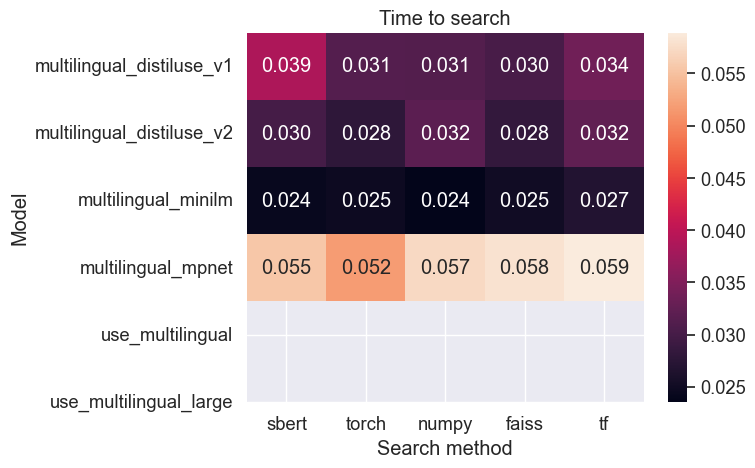

In [64]:
#Globulos rojos, LGBTI, Mujeres.
results = search_all("Objetivos del Desarrollo Sostenible", 10, embeddings)
plot_search_timing(results)
results_df = search_results(results, df, True)
#results_df[results_df["model"].str.contains("multilingual_minilm") & results_df["search_method"].str.contains("sbert") | results_df["model"].str.contains("multilingual_mpnet") & results_df["search_method"].str.contains("sbert")]
results_df[results_df["search_method"].str.contains("sbert")]
#results_df